<a href="https://colab.research.google.com/github/quantwav/Project-dsff/blob/main/Final_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook setup**

In [1]:
%matplotlib inline
# Use %matplotlib ipympl or %matplotlib widget if you want interactive matplotlib plots
#%matplotlib widget

# reloads modules automatically before entering the execution of code typed at the IPython prompt
%load_ext autoreload
%autoreload 2

In [2]:
# Package Imports
!pip install linearmodels
import linearmodels as lm  #for panel data econometrics
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys
import time
import os

# To display dataframes as interactive tables in the notebook:
!pip install itables
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

# Add current directory to access common code in dp.py
#sys.path.insert(0, '/Users/mrrobert/Dropbox/mrrobert/Data')
#sys.path.insert(0, '.')

#import data_paths as dp

# Tolerance for tests
TOL = 1.0e-8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.6/215.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.9 MB/s eta 0:00:00


In [3]:
from shapely.geometry import  Point
import geopandas as gpd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import cm
import urllib.request
import shutil
import zipfile
import re

!pip install contextily
import contextily as ctx

!pip install geoplot
import geoplot as gplt
import lightgbm as lgb
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance
from lightgbm import LGBMClassifier
from matplotlib import pyplot as plt

!pip install pdpbox
from pdpbox import pdp, info_plots   # get_dataset

!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=850ea5fe269447f5cea156c7e34dea21cfd67239189c534062ee020dc00e2647
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 16.1 MB/s eta 0:00:00
  Attempting uninstall: sphinx

## Download crime data

In [4]:
if not os.path.exists("crime_data_2023.csv"):
    !gdown 1C2t0DbgCBBd_KfCFKFETCKi-ow0yiZWK

if not os.path.exists("crime_data_2022.csv"):              #  https://drive.google.com/file/d/1fsagc1icsyHcPjylwOyIO5lZVxiEn8ck/view?usp=drive_link
    !gdown 1fsagc1icsyHcPjylwOyIO5lZVxiEn8ck

if not os.path.exists("crime_data_2021.csv"):             #  https://drive.google.com/file/d/13s7teURWo0_Ew0h8QZIrCtXN4Zkl949m/view?usp=drive_link
    !gdown 13s7teURWo0_Ew0h8QZIrCtXN4Zkl949m

if not os.path.exists("crime_data_2020.csv"):             # https://drive.google.com/file/d/1PzCvWW7NVD3JsQJoFxLMcmEpInB_3C4q/view?usp=drive_link
    !gdown 1PzCvWW7NVD3JsQJoFxLMcmEpInB_3C4q

if not os.path.exists("crime_data_2019.csv"):             # https://drive.google.com/file/d/1wApg9zeTc_ULOykrDzls_sWtxzQg09Nr/view?usp=drive_link
    !gdown 1wApg9zeTc_ULOykrDzls_sWtxzQg09Nr

Downloading...
From: https://drive.google.com/uc?id=1C2t0DbgCBBd_KfCFKFETCKi-ow0yiZWK
To: /content/crime_data_2023.csv
100% 45.8M/45.8M [00:00<00:00, 122MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fsagc1icsyHcPjylwOyIO5lZVxiEn8ck
To: /content/crime_data_2022.csv
100% 41.8M/41.8M [00:00<00:00, 94.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=13s7teURWo0_Ew0h8QZIrCtXN4Zkl949m
To: /content/crime_data_2021.csv
100% 37.3M/37.3M [00:00<00:00, 133MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PzCvWW7NVD3JsQJoFxLMcmEpInB_3C4q
To: /content/crime_data_2020.csv
100% 37.5M/37.5M [00:00<00:00, 105MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wApg9zeTc_ULOykrDzls_sWtxzQg09Nr
To: /content/crime_data_2019.csv
100% 27.3M/27.3M [00:00<00:00, 75.9MB/s]


In [5]:
df1 = (
    pd.read_csv('crime_data_2023.csv',parse_dates=['dispatch_date'])
)

df2 = (
    pd.read_csv('crime_data_2022.csv',parse_dates=['dispatch_date'])
)

df3 = (
    pd.read_csv('crime_data_2021.csv',parse_dates=['dispatch_date'])
)

df4 = (
    pd.read_csv('crime_data_2020.csv',parse_dates=['dispatch_date'])
)

df5 = (
    pd.read_csv('crime_data_2019.csv',parse_dates=['dispatch_date'])
)

## Combining five years of crime data

In [6]:
df_raw_crime = pd.concat([df1, df2, df3, df4, df5], axis=0, ignore_index=True)

df_raw_crime

# df_raw_crime.drop(['the_geom', 'cartodb_id', 'the_geom_webmercator', 'objectid',  'dc_key', 'dc_dist', 'psa', 'ucr_general', 'lat', 'lng'], axis=1, inplace=True)
df_raw_crime.rename(columns= {'point_x':'X', 'point_y':'Y', 'text_general_code':'Category' }, inplace = True)
df_raw_crime

the_geom  cartodb_id  \
0       0101000020E6100000A51C8299A5C752C006342AD3DCFF...         2.0   
1       0101000020E6100000F9245E3B64CC52C0B7195D940FF6...         4.0   
2       0101000020E6100000118A52E7F6C052C0CFF41263190C...         7.0   
3       0101000020E6100000E1F9FB7B5FC552C0159C0B6D4A02...       123.0   
4       0101000020E6100000D1CCD5875CCA52C014B723FFC005...       126.0   
...                                                   ...         ...   
750454                                                NaN         NaN   
750455                                                NaN         NaN   
750456                                                NaN         NaN   
750457                                                NaN         NaN   
750458                                                NaN         NaN   

                                     the_geom_webmercator  objectid  dc_dist  \
0       0101000020110F0000F80DE2A145E65FC1E5EC7592BE8F...       114       25   
1       0101000020110F00000426B7CE54EE5FC1C5E06D37E284...       116        1   
2       0101000020110F00006728CED7EBDA5FC169DB64F8519D...       119        8   
3       0101000020110F00009D28D4D968E25FC13CD5C3D06F92...        96       15   
4       0101000020110F00002F28E30AE2EA5FC10090A3314796...        99       14   
...                                                   ...       ...      ...   
750454                                                NaN  14576199       35   
750455                                                NaN  14576435       22   
750456                                                NaN  14576438       22   
750457                                                NaN  14576440       24   
750458                                                NaN  14577074       18   

       psa      dispatch_date_time dispatch_date dispatch_time  hour  \
0        3  2023-03-11 17:12:00+00    2023-03-11      12:12:00  12.0   
1        1  2023-03-11 18:31:00+00    2023-03-11      13:31:00  13.0   
2        2  2023-03-11 22:13:00+00    2023-03-11      17:13:00  17.0   
3        1  2023-03-11 12:42:00+00    2023-03-11      07:42:00   7.0   
4        1  2023-03-12 00:54:00+00    2023-03-11      19:54:00  19.0   
...     ..                     ...           ...           ...   ...   
750454   1  2019-04-25 04:00:00+00    2019-04-25      00:00:00  22.0   
750455   4  2019-01-17 05:00:00+00    2019-01-17      00:00:00  16.0   
750456   1  2019-05-19 04:00:00+00    2019-05-19      00:00:00  23.0   
750457   1  2019-03-14 04:00:00+00    2019-03-14      00:00:00   2.0   
750458   3  2019-05-07 04:00:00+00    2019-05-07      00:00:00   9.0   

              dc_key              location_block  ucr_general  \
0       2.023250e+11     3300 BLOCK HARTVILLE ST          300   
1       2.023010e+11        2400 BLOCK S 28TH ST          600   
2       2.023080e+11   9800 BLOCK Roosevelt Blvd          600   
3       2.023150e+11       4700 BLOCK GRISCOM ST          600   
4       2.023140e+11         5500 BLOCK BLOYD ST          300   
...              ...                         ...          ...   
750454  2.019350e+11        5200 BLOCK  ARBOR ST          100   
750455  2.019220e+11  1300 BLOCK N MYRTLEWOOD ST          100   
750456  2.019220e+11   2300 BLOCK N CLEVELAND ST          100   
750457  2.019240e+11      3500 BLOCK  STOUTON ST          100   
750458  2.019180e+11      4200 BLOCK  CHESTER AV          100   

                   Category          X          Y        lat        lng  
0        Robbery No Firearm -75.119482  39.998927  39.998927 -75.119482  
1        Theft from Vehicle -75.193618  39.922350  39.922350 -75.193618  
2                    Thefts -75.015070  40.094525  40.094525 -75.015070  
3                    Thefts -75.083953  40.017896  40.017896 -75.083953  
4        Robbery No Firearm -75.161898  40.044952  40.044952 -75.161898  
...                     ...        ...        ...        ...        ...  
750454  Homicide - Criminal -75.117130  40.0297

## Duplicates and outliers

In [7]:
from sklearn.model_selection import train_test_split

# Duplicates and outliers
df_raw_crime.drop_duplicates(inplace=True)
df_raw_crime.dropna()

# df_raw_crime.replace({'X': -120.5, 'Y': 90.0}, pd.NA, inplace=True)

df_raw_crime

the_geom  cartodb_id  \
0       0101000020E6100000A51C8299A5C752C006342AD3DCFF...         2.0   
1       0101000020E6100000F9245E3B64CC52C0B7195D940FF6...         4.0   
2       0101000020E6100000118A52E7F6C052C0CFF41263190C...         7.0   
3       0101000020E6100000E1F9FB7B5FC552C0159C0B6D4A02...       123.0   
4       0101000020E6100000D1CCD5875CCA52C014B723FFC005...       126.0   
...                                                   ...         ...   
750454                                                NaN         NaN   
750455                                                NaN         NaN   
750456                                                NaN         NaN   
750457                                                NaN         NaN   
750458                                                NaN         NaN   

                                     the_geom_webmercator  objectid  dc_dist  \
0       0101000020110F0000F80DE2A145E65FC1E5EC7592BE8F...       114       25   
1       0101000020110F00000426B7CE54EE5FC1C5E06D37E284...       116        1   
2       0101000020110F00006728CED7EBDA5FC169DB64F8519D...       119        8   
3       0101000020110F00009D28D4D968E25FC13CD5C3D06F92...        96       15   
4       0101000020110F00002F28E30AE2EA5FC10090A3314796...        99       14   
...                                                   ...       ...      ...   
750454                                                NaN  14576199       35   
750455                                                NaN  14576435       22   
750456                                                NaN  14576438       22   
750457                                                NaN  14576440       24   
750458                                                NaN  14577074       18   

       psa      dispatch_date_time dispatch_date dispatch_time  hour  \
0        3  2023-03-11 17:12:00+00    2023-03-11      12:12:00  12.0   
1        1  2023-03-11 18:31:00+00    2023-03-11      13:31:00  13.0   
2        2  2023-03-11 22:13:00+00    2023-03-11      17:13:00  17.0   
3        1  2023-03-11 12:42:00+00    2023-03-11      07:42:00   7.0   
4        1  2023-03-12 00:54:00+00    2023-03-11      19:54:00  19.0   
...     ..                     ...           ...           ...   ...   
750454   1  2019-04-25 04:00:00+00    2019-04-25      00:00:00  22.0   
750455   4  2019-01-17 05:00:00+00    2019-01-17      00:00:00  16.0   
750456   1  2019-05-19 04:00:00+00    2019-05-19      00:00:00  23.0   
750457   1  2019-03-14 04:00:00+00    2019-03-14      00:00:00   2.0   
750458   3  2019-05-07 04:00:00+00    2019-05-07      00:00:00   9.0   

              dc_key              location_block  ucr_general  \
0       2.023250e+11     3300 BLOCK HARTVILLE ST          300   
1       2.023010e+11        2400 BLOCK S 28TH ST          600   
2       2.023080e+11   9800 BLOCK Roosevelt Blvd          600   
3       2.023150e+11       4700 BLOCK GRISCOM ST          600   
4       2.023140e+11         5500 BLOCK BLOYD ST          300   
...              ...                         ...          ...   
750454  2.019350e+11        5200 BLOCK  ARBOR ST          100   
750455  2.019220e+11  1300 BLOCK N MYRTLEWOOD ST          100   
750456  2.019220e+11   2300 BLOCK N CLEVELAND ST          100   
750457  2.019240e+11      3500 BLOCK  STOUTON ST          100   
750458  2.019180e+11      4200 BLOCK  CHESTER AV          100   

                   Category          X          Y        lat        lng  
0        Robbery No Firearm -75.119482  39.998927  39.998927 -75.119482  
1        Theft from Vehicle -75.193618  39.922350  39.922350 -75.193618  
2                    Thefts -75.015070  40.094525  40.094525 -75.015070  
3                    Thefts -75.083953  40.017896  40.017896 -75.083953  
4        Robbery No Firearm -75.161898  40.044952  40.044952 -75.161898  
...                     ...        ...        ...        ...        ...  
750454  Homicide - Criminal -75.117130  40.0297

# **EDA and Data Visualization**

## Position of the data points

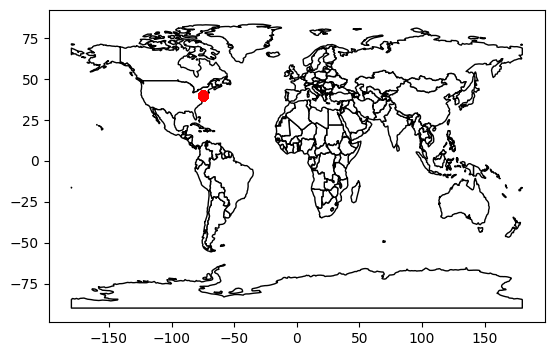

In [8]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

def create_gdf(df_raw_crime):
    # Create a copy of the DataFrame
    gdf = df_raw_crime.copy()

    # Combine the latitude and longitude columns into a single 'Coordinates' column
    gdf['Coordinates'] = list(zip(gdf.X, gdf.Y))

    # Convert the 'Coordinates' column to Point objects
    gdf.Coordinates = gdf.Coordinates.apply(Point)

    # Create a GeoDataFrame from the DataFrame with geometry set to 'Coordinates'
    # and coordinate reference system (CRS) set to EPSG 4326
    gdf = gpd.GeoDataFrame(
        gdf, geometry='Coordinates', crs={'init': 'epsg:4326'})

    return gdf

# You need to replace 'df' with your actual dataset
df_raw_crime_gdf = create_gdf(df_raw_crime)

# Read world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map with land areas in white and boundaries in black
ax = world.plot(color='white', edgecolor='black')

# Plot the training GeoDataFrame on top of the world map with red color
df_raw_crime_gdf.plot(ax=ax, color='red')

# Show the plot
plt.show()


## Distribution of the Number of Incidents per Day

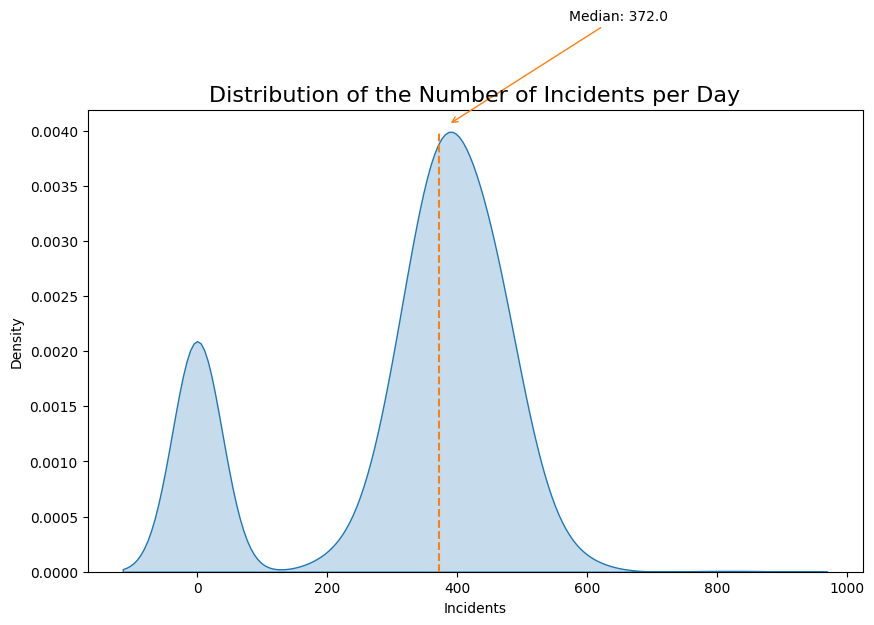

In [9]:
col = sns.color_palette()

# Calculate the date and hour
df_raw_crime['Date'] = df_raw_crime.dispatch_date.dt.date
df_raw_crime['Hour'] = df_raw_crime.dispatch_date.dt.hour

# Create the figure
plt.figure(figsize=(10, 6))

# Calculate the number of incidents per day and generate a kernel density plot
incident_count_per_day = df_raw_crime.groupby('Date').count().iloc[:, 0]
sns.kdeplot(data=incident_count_per_day, shade=True)

# Plot a dashed line at the median and add annotation
median_value = incident_count_per_day.median()
plt.axvline(x=median_value, ymax=0.95, linestyle='--', color=col[1])
plt.annotate('Median: ' + str(median_value),
             xy=(median_value, 0.004),
             xytext=(median_value + 200, 0.005),
             arrowprops=dict(arrowstyle='->', color=col[1], shrinkB=10))

# Set the title and axis labels
plt.title('Distribution of the Number of Incidents per Day', fontdict={'fontsize': 16})
plt.xlabel('Incidents')
plt.ylabel('Density')
plt.legend().remove()
plt.show()


In [10]:
# Extract the weekday information from the 'dispatch_date' column and assign it to a new column 'weekday'
df_raw_crime['weekday'] = df_raw_crime['dispatch_date'].dt.weekday

# Define a mapping between numerical representation of weekdays and their corresponding names
weekday_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Map the numerical representation of weekdays to their corresponding names using the mapping defined above
df_raw_crime['weekday'] = df_raw_crime['weekday'].map(weekday_mapping)

# Display the DataFrame with the added 'weekday' column containing the names of weekdays
df_raw_crime

the_geom  cartodb_id  \
0       0101000020E6100000A51C8299A5C752C006342AD3DCFF...         2.0   
1       0101000020E6100000F9245E3B64CC52C0B7195D940FF6...         4.0   
2       0101000020E6100000118A52E7F6C052C0CFF41263190C...         7.0   
3       0101000020E6100000E1F9FB7B5FC552C0159C0B6D4A02...       123.0   
4       0101000020E6100000D1CCD5875CCA52C014B723FFC005...       126.0   
...                                                   ...         ...   
750454                                                NaN         NaN   
750455                                                NaN         NaN   
750456                                                NaN         NaN   
750457                                                NaN         NaN   
750458                                                NaN         NaN   

                                     the_geom_webmercator  objectid  dc_dist  \
0       0101000020110F0000F80DE2A145E65FC1E5EC7592BE8F...       114       25   
1       0101000020110F00000426B7CE54EE5FC1C5E06D37E284...       116        1   
2       0101000020110F00006728CED7EBDA5FC169DB64F8519D...       119        8   
3       0101000020110F00009D28D4D968E25FC13CD5C3D06F92...        96       15   
4       0101000020110F00002F28E30AE2EA5FC10090A3314796...        99       14   
...                                                   ...       ...      ...   
750454                                                NaN  14576199       35   
750455                                                NaN  14576435       22   
750456                                                NaN  14576438       22   
750457                                                NaN  14576440       24   
750458                                                NaN  14577074       18   

       psa      dispatch_date_time dispatch_date dispatch_time  hour  ...  \
0        3  2023-03-11 17:12:00+00    2023-03-11      12:12:00  12.0  ...   
1        1  2023-03-11 18:31:00+00    2023-03-11      13:31:00  13.0  ...   
2        2  2023-03-11 22:13:00+00    2023-03-11      17:13:00  17.0  ...   
3        1  2023-03-11 12:42:00+00    2023-03-11      07:42:00   7.0  ...   
4        1  2023-03-12 00:54:00+00    2023-03-11      19:54:00  19.0  ...   
...     ..                     ...           ...           ...   ...  ...   
750454   1  2019-04-25 04:00:00+00    2019-04-25      00:00:00  22.0  ...   
750455   4  2019-01-17 05:00:00+00    2019-01-17      00:00:00  16.0  ...   
750456   1  2019-05-19 04:00:00+00    2019-05-19      00:00:00  23.0  ...   
750457   1  2019-03-14 04:00:00+00    2019-03-14      00:00:00   2.0  ...   
750458   3  2019-05-07 04:00:00+00    2019-05-07      00:00:00   9.0  ...   

                    location_block ucr_general             Category  \
0          3300 BLOCK HARTVILLE ST         300   Robbery No Firearm   
1             2400 BLOCK S 28TH ST         600   Theft from Vehicle   
2        9800 BLOCK Roosevelt Blvd         600               Thefts   
3            4700 BLOCK GRISCOM ST         600               Thefts   
4              5500 BLOCK BLOYD ST         300   Robbery No Firearm   
...                            ...         ...                  ...   
750454        5200 BLOCK  ARBOR ST         100  Homicide - Criminal   
750455  1300 BLOCK N MYRTLEWOOD ST         100  Homicide - Criminal   
750456   2300 BLOCK N CLEVELAND ST         100  Homicide - Criminal   
750457      3500 BLOCK  STOUTON ST         100  Homicide - Criminal   
750458      4200 BLOCK  CHESTER AV         100  Homicide - Criminal   

                X          Y        lat        lng        Date Hour   weekday  
0      -75.119482  39.998927  39.998927 -75.119482  2023-03-11    0  Saturday  
1      -75.193618  39.922350  39.922350 -75.193618  2023-03-11    0  Saturday  
2      -75.015070  40.094525  40.094525 -75.015070  2023-03-11    0  Saturday  
3      -75.083953  40.017896  40.017896 -75.083953  2023-03-11    0  Saturday  
4      -75.161898  40.044952  40.

## Incidents per Weekday

In [11]:
data = df_raw_crime.groupby('weekday').size()
data = data.reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
    'Sunday'
])


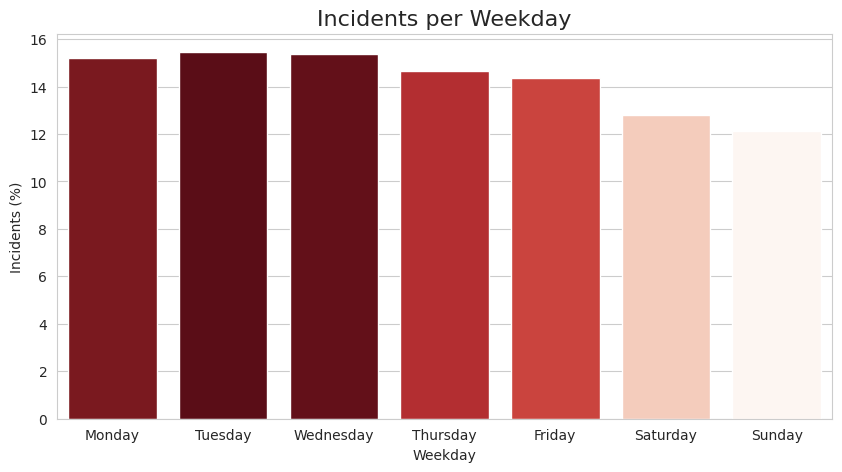

In [12]:
from matplotlib import cm  # Importing colormap module from matplotlib

plt.figure(figsize=(10, 5))  # Creating a figure with size 10x5 inches

with sns.axes_style("whitegrid"):  # Setting seaborn's axes style to "whitegrid"
    # Creating a bar plot
    ax = sns.barplot(
        x = data.index,  # X-axis data (weekdays)
        y = (data.values / data.values.sum()) * 100,  # Y-axis data (percentage of incidents)
        orient='v',  # Orientation of the bars (vertical)
        palette=cm.ScalarMappable(cmap='Reds').to_rgba(data.values)  # Color palette for the bars
    )

# Setting title, xlabel, and ylabel
plt.title('Incidents per Weekday', fontdict={'fontsize': 16})
plt.xlabel('Weekday')
plt.ylabel('Incidents (%)')

# Displaying the plot
plt.show()


## Incidents per Crime Category

In [13]:
data = df_raw_crime.groupby('Category').count().iloc[:, 0].sort_values(
    ascending=False)
#data = data.reindex(np.append(np.delete(data.index, 1), 'OTHER OFFENSES'))

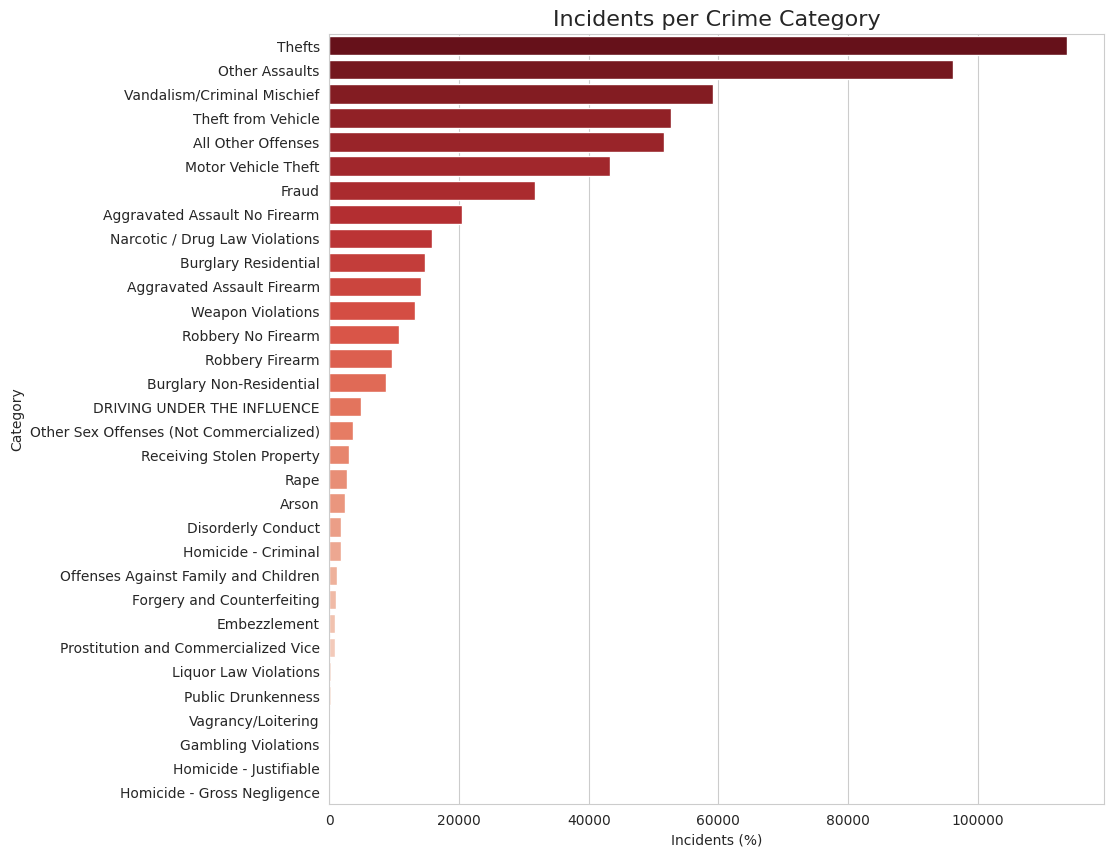

In [14]:
plt.figure(figsize=(10, 10))  # Creating a figure with size 10x10 inches

with sns.axes_style("whitegrid"):  # Setting seaborn's axes style to "whitegrid"
    # Creating a horizontal bar plot
    ax = sns.barplot(
        x=data.values,  # X-axis data (percentage of incidents)
        y=data.index,  # Y-axis data (crime categories)
        orient='h',  # Orientation of the bars (horizontal)
        palette="Reds_r"  # Color palette for the bars (reversed 'Reds' colormap)
    )

# Setting title and xlabel
plt.title('Incidents per Crime Category', fontdict={'fontsize': 16})
plt.xlabel('Incidents (%)')

# Displaying the plot
plt.show()


## Police Districts

Downloading...
From: https://drive.google.com/uc?id=1MreKdCXa3sUmJWjZDVUwPtqc4G_7M6Qa
To: /content/Boundaries_District.zip
100% 87.1k/87.1k [00:00<00:00, 5.27MB/s]


<Figure size 1000x1000 with 0 Axes>

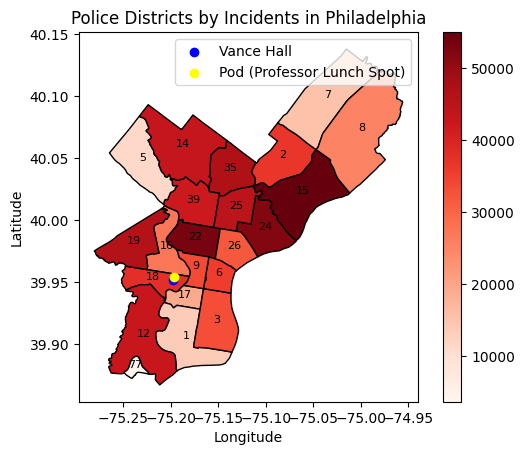

In [15]:
# Downloading the shapefile of the area
if not os.path.exists("Boundaries_District.zip"):
    !gdown 1MreKdCXa3sUmJWjZDVUwPtqc4G_7M6Qa

# Unzipping the data
with zipfile.ZipFile('Boundaries_District.zip', 'r') as zip_ref:
    zip_ref.extractall('Boundaries_District')

# Loading into a geopandas DataFrame
for filename in os.listdir('./Boundaries_District/'):
    if filename.endswith(".shp"):
        pd_districts_philly = gpd.read_file('./Boundaries_District/'+filename)
        break
pd_districts_philly

# Defining the coordinate system to longitude/latitude
pd_districts_philly.crs={'init': 'epsg:4326'}

# Merging the dataset and converting coordinate system
# pd_districts_philly = pd_districts_philly.to_crs(epsg=3857)

# Calculating the number of incidents for each police district
incident_counts = df_raw_crime.groupby('dc_dist').size()
pd_districts_philly['Incidents'] = pd_districts_philly['DIST_NUM'].map(incident_counts)

plt.figure(figsize=(10, 10))
ax = pd_districts_philly.plot(column='Incidents', cmap='Reds', edgecolor='black', legend=True)

# Annotate each district with its district code
for idx, row in pd_districts_philly.iterrows():
    ax.annotate(text=row['DIST_NUM'], xy=row.geometry.centroid.coords[0], horizontalalignment='center', fontsize=8)

# Adding Vance Hall point
vance_hall_coords = (39.95131820695971, -75.19783176239285)
ax.scatter(vance_hall_coords[1], vance_hall_coords[0], color='blue', marker='o', label='Vance Hall')
ax.annotate('Vance Hall', xy=vance_hall_coords, xytext=(vance_hall_coords[1]+0.001, vance_hall_coords[0]+0.001), fontsize=8)

# Adding Professor Lunch Spot point
prof_lunch_spot_coords = (39.953981086380914, -75.19602855798271)
ax.scatter(prof_lunch_spot_coords[1], prof_lunch_spot_coords[0], color='yellow', marker='o', label='Pod (Professor Lunch Spot)')
ax.annotate('Professor Lunch Spot', xy=prof_lunch_spot_coords, xytext=(prof_lunch_spot_coords[1]+0.001, prof_lunch_spot_coords[0]+0.001), fontsize=8)

# Adding legend
ax.legend()

plt.title('Police Districts by Incidents in Philadelphia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# **Exploratory Visualization**

In [16]:
# Downloading the shapefile of the area
if not os.path.exists("mygeodata.zip"):
    !gdown 1tB92EpB3VdIdOMB-9KlaQFfE02YWXmd8

# Unzipping the data
with zipfile.ZipFile('mygeodata.zip', 'r') as zip_ref:
    zip_ref.extractall('mygeodata-shp')


Downloading...
From: https://drive.google.com/uc?id=1tB92EpB3VdIdOMB-9KlaQFfE02YWXmd8
To: /content/mygeodata.zip
100% 31.5k/31.5k [00:00<00:00, 57.2MB/s]


## Crime Categories Density in Philadelphia

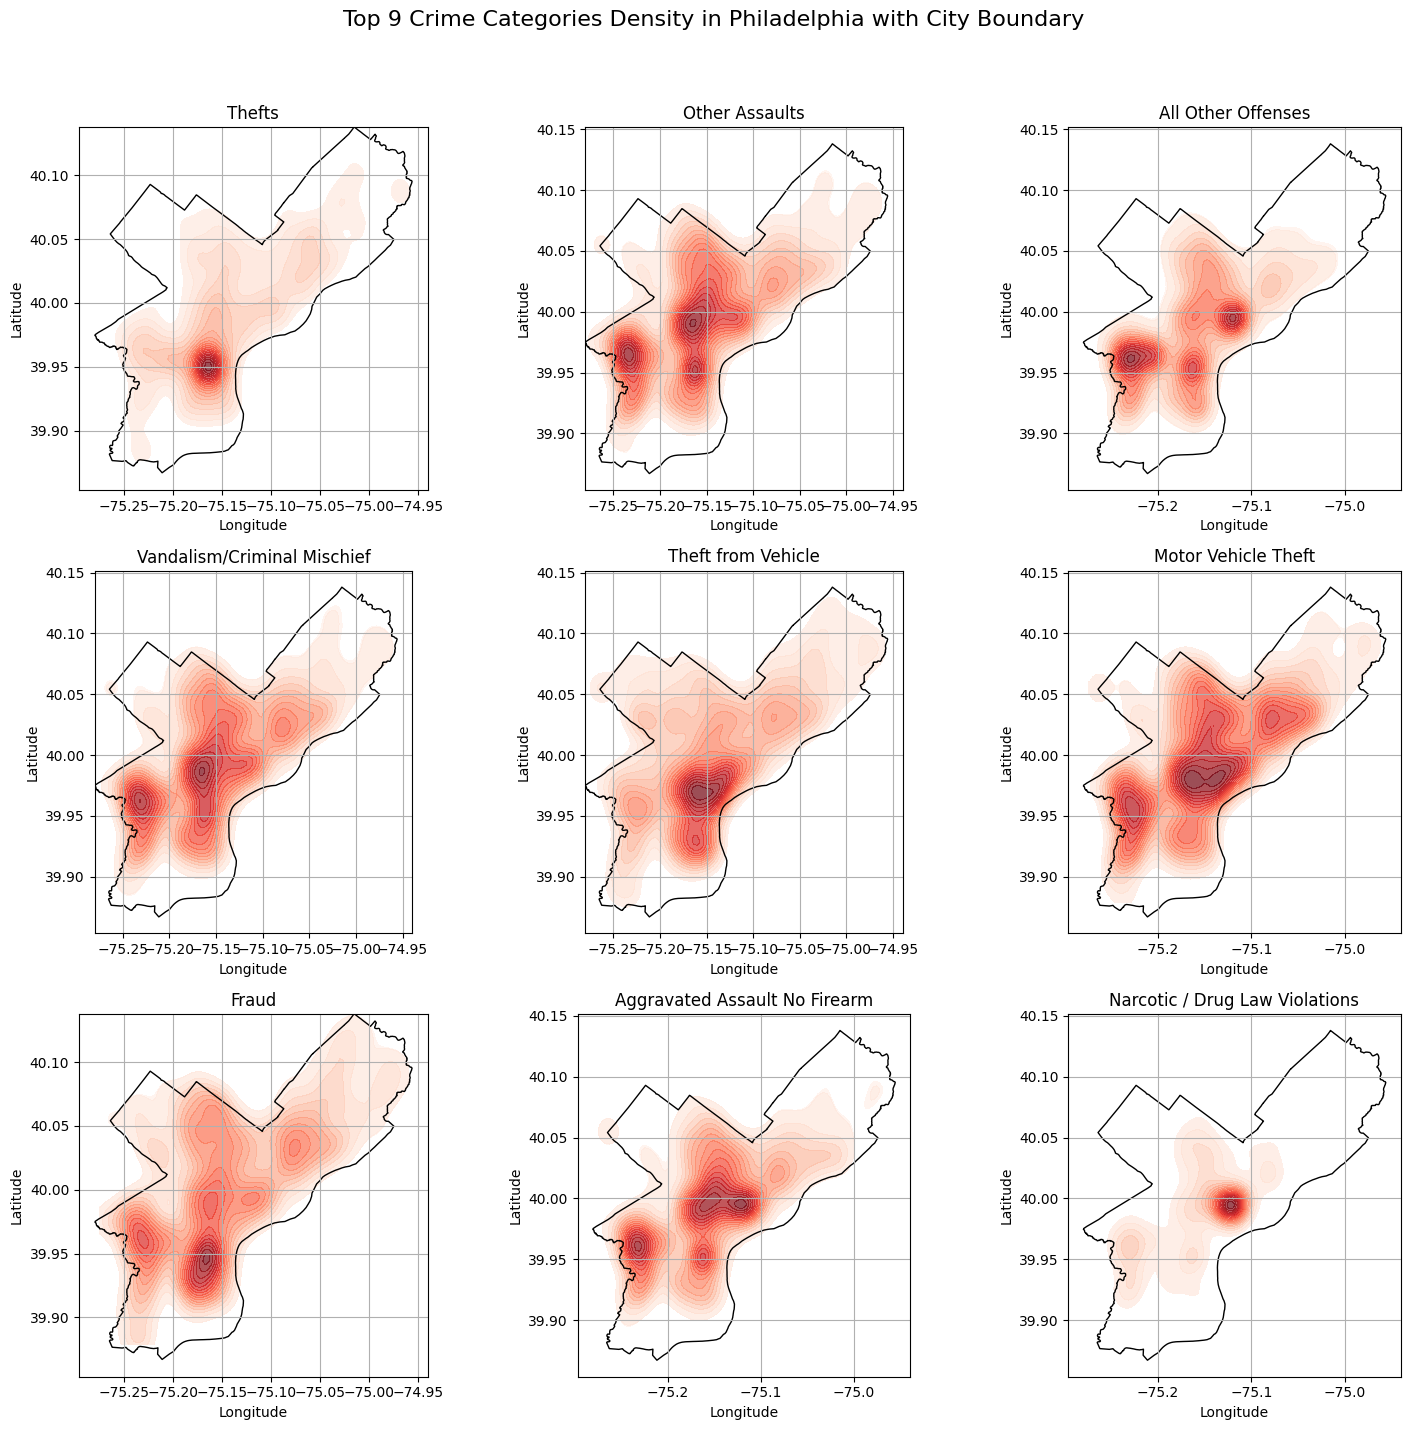

In [17]:
from sklearn.neighbors import KernelDensity

# Get the top nine most frequent crime categories
top_categories = df_raw_crime['Category'].value_counts().head(9).index.tolist()

# Filter the DataFrame to include only these categories
df_raw_crime_top = df_raw_crime[df_raw_crime['Category'].isin(top_categories)]

# Drop rows with NaN values
df_raw_crime_top = df_raw_crime_top.dropna(subset=['X', 'Y'])

# Create a GeoDataFrame with geometry column for plotting
geometry = [Point(xy) for xy in zip(df_raw_crime_top['X'], df_raw_crime_top['Y'])]
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df_raw_crime_top, crs=crs, geometry=geometry)

# Load Philadelphia city boundary shapefile
city_boundary = gpd.read_file('mygeodata-shp/border_level6_polygon.shp')

# Set up the grid of plots
cols = 3  # Number of columns in the grid
rows = -(-len(top_categories) // cols)  # Round up division to get number of rows

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

# Create a colormap
cmap = 'Reds'  # Choose a colormap for density representation

# Plot density estimation for each crime category on a separate subplot
for i, category in enumerate(top_categories):
    row_idx = i // cols
    col_idx = i % cols
    ax = axes[row_idx, col_idx] if rows > 1 else axes[col_idx]

    category_df = geo_df[geo_df['Category'] == category]

    # Extract X and Y coordinates
    points = np.array(category_df[['X', 'Y']])

    # Perform KDE
    kde = KernelDensity(bandwidth=0.01, kernel='gaussian')
    kde.fit(points)

    # Create a grid of coordinates to evaluate KDE
    x_min, x_max = category_df['X'].min(), category_df['X'].max()
    y_min, y_max = category_df['Y'].min(), category_df['Y'].max()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    xy_sample = np.vstack([xx.ravel(), yy.ravel()]).T
    z = np.exp(kde.score_samples(xy_sample))
    z = z.reshape(xx.shape)

    # Plot KDE as a contour plot
    ax.contourf(xx, yy, z, cmap=cmap, levels=20, alpha=0.7)

    # Set background color to white where density is zero
    ax.contourf(xx, yy, z, colors='white', levels=[0, z.max()*0.05], alpha=1)

    ax.set_title(category)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(True)

    # Plot city boundary
    city_boundary.plot(ax=ax, color='none', edgecolor='black', linewidth=1)

    ax.set_title(category)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(True)

# Hide empty subplots
if len(top_categories) < rows * cols:
    for i in range(len(top_categories), rows * cols):
        row_idx = i // cols
        col_idx = i % cols
        axes[row_idx, col_idx].axis('off')

plt.suptitle('Top 9 Crime Categories Density in Philadelphia with City Boundary', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Time Distribution of Crime of different Categories

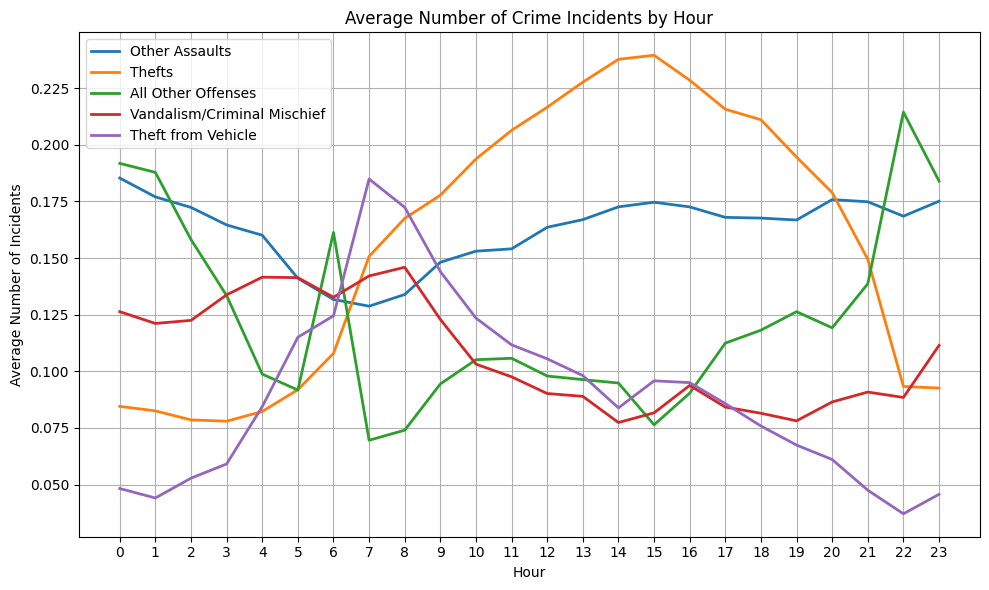

In [18]:
# Calculate the average number of incidents for each crime category within each hour
hourly_category_avg = df_raw_crime.groupby(['hour', 'Category']).size().unstack().div(df_raw_crime.groupby('hour').size(), axis=0).fillna(0)

# Find the top five crime categories with the highest total number of incidents
top_categories = hourly_category_avg.sum().nlargest(5).index

# Plot the line chart
plt.figure(figsize=(10, 6))

# Plot the lines for the top five crime categories with the highest total number of incidents
for category in top_categories:
    plt.plot(hourly_category_avg.index, hourly_category_avg[category], label=category, linewidth=2)

plt.title('Average Number of Crime Incidents by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Number of Incidents')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Time Trends per Crime Category

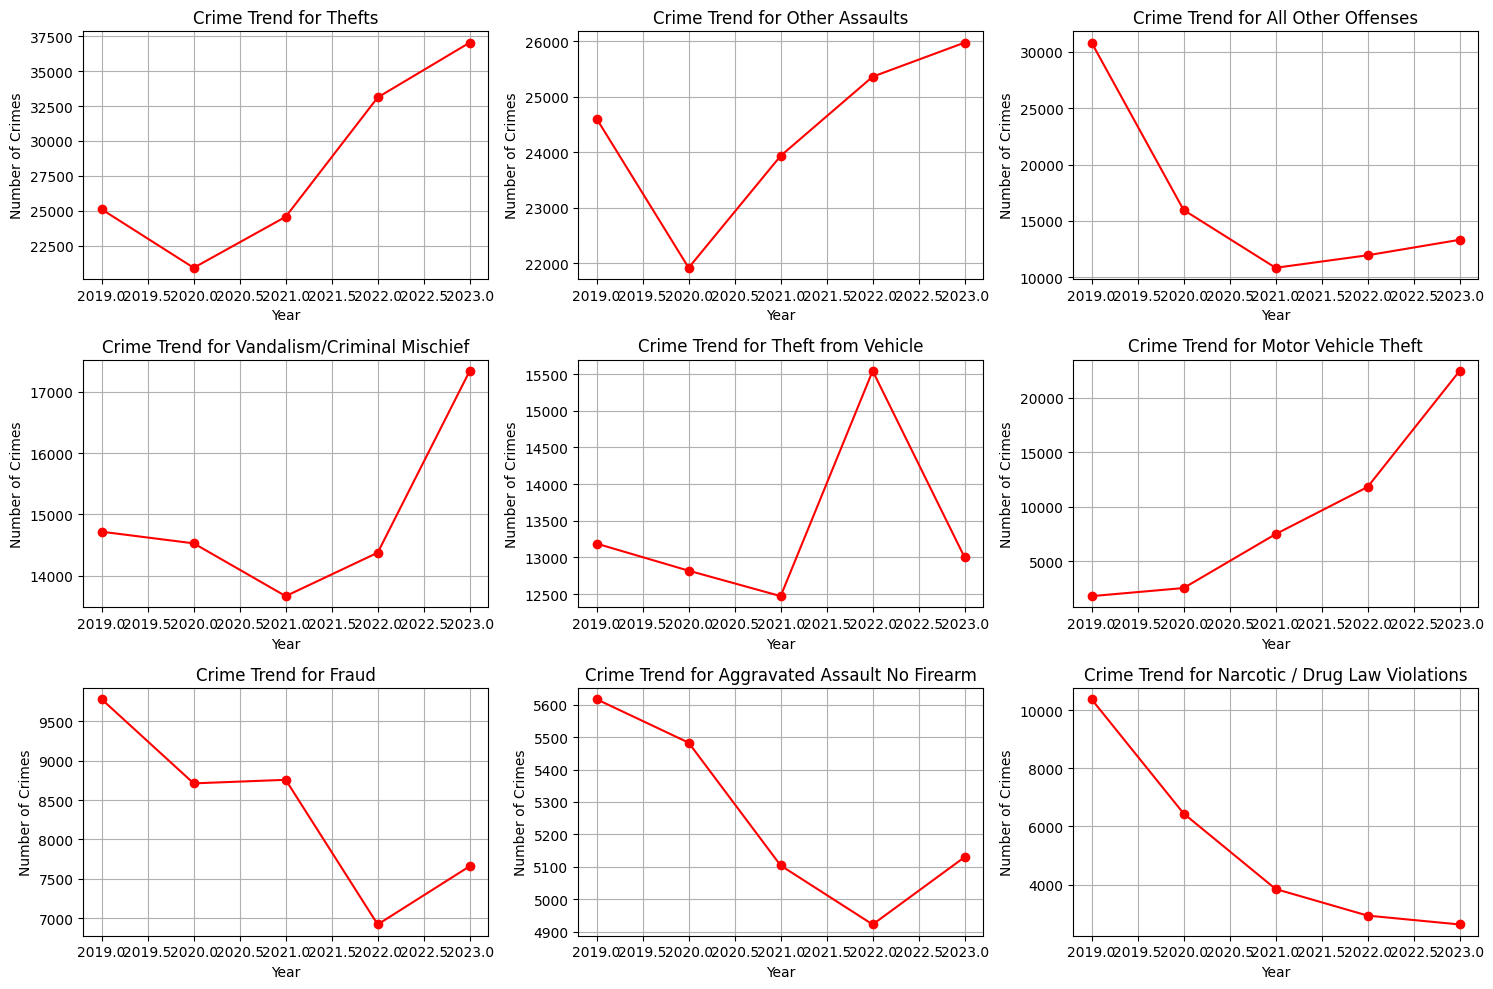

In [19]:
top_crime_types = df_raw_crime['Category'].value_counts().head(9).index

df_raw_crime['dispatch_year'] = df_raw_crime['dispatch_date'].dt.year

years = [2019, 2020, 2021, 2022, 2023]


plt.figure(figsize=(15, 10))

for i, crime_type in enumerate(top_crime_types):
    crime_data = df_raw_crime[df_raw_crime['Category'] == crime_type]

    yearly_counts = crime_data.groupby('dispatch_year').size()

    yearly_counts = yearly_counts.reindex(years, fill_value=0)

    plt.subplot(3, 3, i+1)

    plt.plot(years, yearly_counts, color='red', marker='o', linestyle='-')

    plt.title(f'Crime Trend for {crime_type}')
    plt.xlabel('Year')
    plt.ylabel('Number of Crimes')
    plt.grid(True)

plt.tight_layout()

plt.show()

## Crime Count by Time of Day and Type

In [20]:
df_raw_crime['dispatch_time'] = pd.to_datetime(df_raw_crime['dispatch_time'])
df_raw_crime['Hour'] = df_raw_crime['dispatch_time'].dt.hour

def categorize_time(hour):
    if 5 <= hour <= 7:
        return "Early Morning"
    elif 8 <= hour <= 11:
        return "Morning"
    elif 12 <= hour <= 15:
        return "Afternoon"
    elif 16 <= hour <= 19:
        return "Evening"
    elif 20 <= hour <= 23:
        return "Late Evening"
    else:
        return "Night"

# Apply the function to create a new column
df_raw_crime['time_of_day'] = df_raw_crime['Hour'].apply(categorize_time)

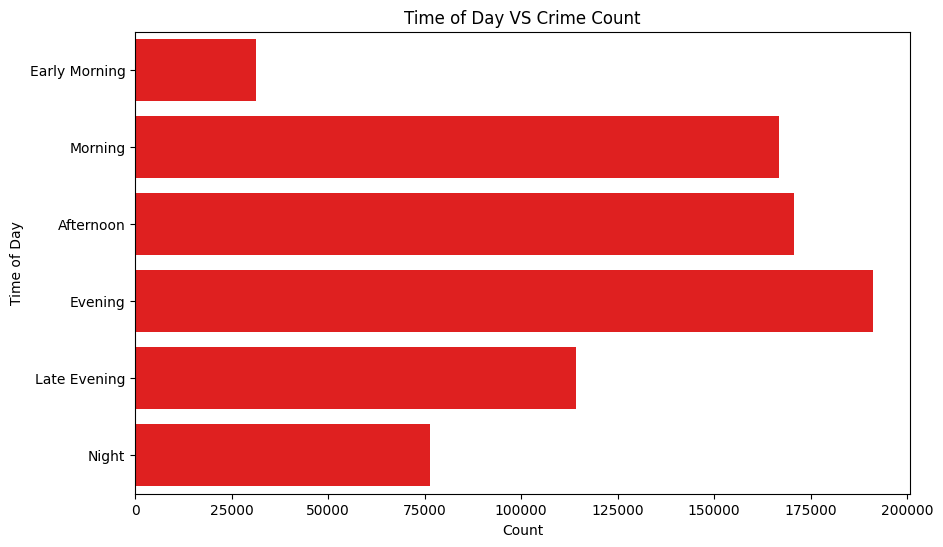

In [21]:
crime_counts = df_raw_crime['time_of_day'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.countplot(data=df_raw_crime, y='time_of_day', color='red',order=['Early Morning','Morning','Afternoon','Evening'
                                                                 ,'Late Evening','Night'])
plt.title('Time of Day VS Crime Count')  # Add title
plt.xlabel('Count')  # Add x-axis label if needed
plt.ylabel('Time of Day')  # Add y-axis label if needed
plt.show()

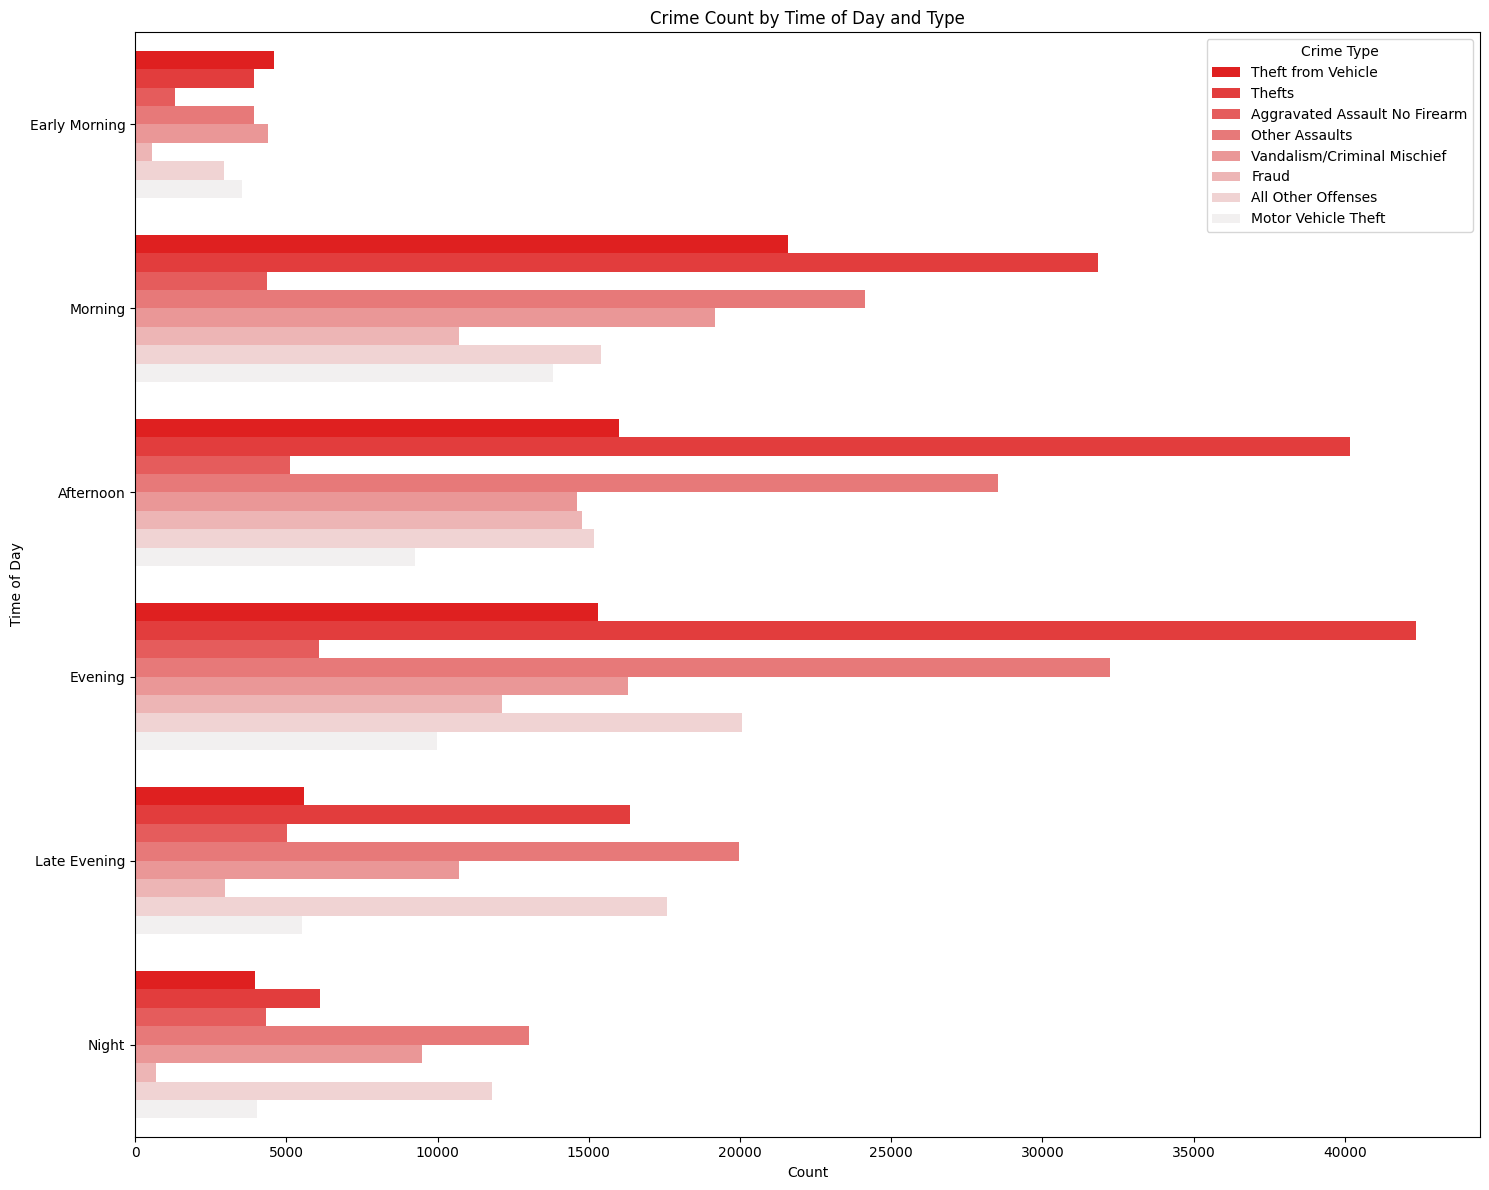

In [22]:
crime_counts = df_raw_crime['Category'].value_counts()
top_crime_types = crime_counts.head(8).index.tolist()
df_top_crimes = df_raw_crime[df_raw_crime['Category'].isin(top_crime_types)]

red_palette = sns.light_palette("red", n_colors=len(top_crime_types), reverse=True)

plt.figure(figsize=(15, 12))
sns.countplot(data=df_top_crimes, y='time_of_day', hue='Category', palette=red_palette, order=['Early Morning','Morning','Afternoon','Evening','Late Evening','Night'])
plt.title('Crime Count by Time of Day and Type')
plt.xlabel('Count')
plt.ylabel('Time of Day')
plt.legend(title='Crime Type', loc='upper right')

plt.tight_layout()
plt.show()

## Crime Count by Severity

In [23]:
crime_severity_mapping = {
    'Robbery Firearm': 'Severe',
    'Other Assaults': 'Moderate',
    'Thefts': 'Minor',
    'Vandalism/Criminal Mischief': 'Moderate',
    'Burglary Non-Residential': 'Moderate',
    'Motor Vehicle Theft': 'Moderate',
    'Aggravated Assault No Firearm': 'Severe',
    'Robbery No Firearm': 'Moderate',
    'Weapon Violations': 'Moderate',
    'Fraud': 'Minor',
    'Burglary Residential': 'Moderate',
    'Liquor Law Violations': 'Minor',
    'Receiving Stolen Property': 'Minor',
    'All Other Offenses': 'Minor',
    'Aggravated Assault Firearm': 'Severe',
    'Theft from Vehicle': 'Minor',
    'Rape': 'Severe',
    'Other Sex Offenses (Not Commercialized)': 'Moderate',
    'Narcotic / Drug Law Violations': 'Moderate',
    'Disorderly Conduct': 'Minor',
    'DRIVING UNDER THE INFLUENCE': 'Moderate',
    'Arson': 'Severe',
    'Embezzlement': 'Minor',
    'Forgery and Counterfeiting': 'Minor',
    'Homicides': 'Severe',
    'Offenses Against Family and Children': 'Moderate',
    'Prostitution and Commercialized Vice': 'Moderate',
    'Public Drunkenness': 'Minor',
    'Vagrancy/Loitering': 'Minor',
    'Gambling Violations': 'Minor'
}

df_raw_crime['degree_of_crime'] = df_raw_crime['Category'].map(crime_severity_mapping)

df_raw_crime['degree_of_crime'].value_counts()

degree_of_crime
Moderate    344357
Minor       341968
Severe       61792
Name: count, dtype: int64

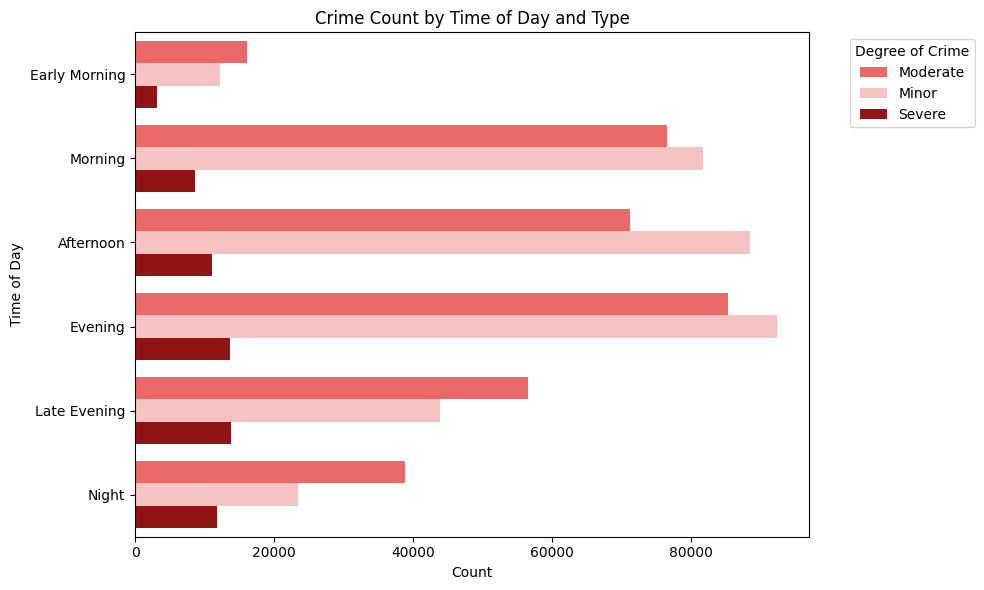

In [24]:
crime_degree_colors = {
    'Minor': '#ffbaba',
    'Moderate': '#ff5252',
    'Severe': '#a70000'
}

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df_raw_crime, y='time_of_day', hue='degree_of_crime',
              order=['Early Morning','Morning','Afternoon','Evening','Late Evening','Night'],
             palette=crime_degree_colors)
plt.title('Crime Count by Time of Day and Type')
plt.xlabel('Count')
plt.ylabel('Time of Day')
plt.legend(title='Degree of Crime', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Add Climate Data

In [25]:
df_climate = pd.read_excel('climate_philly.xlsx')
df_old = pd.merge(df_raw_crime, df_climate, left_on='dispatch_date', right_on='DATE', how='inner')
df_old.drop(columns=['DATE'], inplace=True)
df_old


the_geom  cartodb_id  \
0       0101000020E6100000A51C8299A5C752C006342AD3DCFF...         2.0   
1       0101000020E6100000F9245E3B64CC52C0B7195D940FF6...         4.0   
2       0101000020E6100000118A52E7F6C052C0CFF41263190C...         7.0   
3       0101000020E6100000E1F9FB7B5FC552C0159C0B6D4A02...       123.0   
4       0101000020E6100000D1CCD5875CCA52C014B723FFC005...       126.0   
...                                                   ...         ...   
747807                                                NaN         NaN   
747808                                                NaN         NaN   
747809                                                NaN         NaN   
747810                                                NaN         NaN   
747811                                                NaN         NaN   

                                     the_geom_webmercator  objectid  dc_dist  \
0       0101000020110F0000F80DE2A145E65FC1E5EC7592BE8F...       114       25   
1       0101000020110F00000426B7CE54EE5FC1C5E06D37E284...       116        1   
2       0101000020110F00006728CED7EBDA5FC169DB64F8519D...       119        8   
3       0101000020110F00009D28D4D968E25FC13CD5C3D06F92...        96       15   
4       0101000020110F00002F28E30AE2EA5FC10090A3314796...        99       14   
...                                                   ...       ...      ...   
747807                                                NaN   1508610       24   
747808                                                NaN   1505281       35   
747809                                                NaN   1510272       15   
747810                                                NaN   1526672       18   
747811                                                NaN   1527140       15   

       psa      dispatch_date_time dispatch_date       dispatch_time  hour  \
0        3  2023-03-11 17:12:00+00    2023-03-11 2024-04-18 12:12:00  12.0   
1        1  2023-03-11 18:31:00+00    2023-03-11 2024-04-18 13:31:00  13.0   
2        2  2023-03-11 22:13:00+00    2023-03-11 2024-04-18 17:13:00  17.0   
3        1  2023-03-11 12:42:00+00    2023-03-11 2024-04-18 07:42:00   7.0   
4        1  2023-03-12 00:54:00+00    2023-03-11 2024-04-18 19:54:00  19.0   
...     ..                     ...           ...                 ...   ...   
747807   1  2019-01-01 00:19:00+00    2018-12-31 2024-04-18 19:19:00  19.0   
747808   1  2019-01-01 00:18:00+00    2018-12-31 2024-04-18 19:18:00  19.0   
747809   1  2019-01-01 00:34:00+00    2018-12-31 2024-04-18 19:34:00  19.0   
747810   2  2019-01-01 01:16:00+00    2018-12-31 2024-04-18 20:16:00  20.0   
747811   1  2019-01-01 01:17:00+00    2018-12-31 2024-04-18 20:17:00  20.0   

        ...        lng        Date  Hour   weekday  dispatch_year  \
0       ... -75.119482  2023-03-11    12  Saturday           2023   
1       ... -75.193618  2023-03-11    13  Saturday           2023   
2       ... -75.015070  2023-03-11    17  Saturday           2023   
3       ... -75.083953  2023-03-11     7  Saturday           2023   
4       ... -75.161898  2023-03-11    19  Saturday           2023   
...     ...        ...         ...   ...       ...            ...   
747807  ... -75.106446  2018-12-31    19    Monday           2018   
747808  ... -75.139033  2018-12-31    19    Monday           2018   
747809  ... -75.103900  2018-12-31    19    Monday           2018   
747810  ... -75.237807  2018-12-31    20    Monday           2018   
747811  ... -75.103900  2018-12-31    20    Monday           2018   

          time_of_day  degree_of_crime  PRCP  TMAX  TMIN  
0           Afternoon         Moderate  0.14  45.0  36.0  
1           Afternoon            Minor  0.14  45.0  36.0  
2             Evening            Minor  0.14  45.0  36.0  
3       Early Morning            Minor  0.14  45.0  36.0  
4             Evening         Moderate  0.14  45.0  36.0  
...               ...              ...   ...   ...   ...  
747807        Evening         Mo

## Daily Crime Count, Temperature, and Precipitation

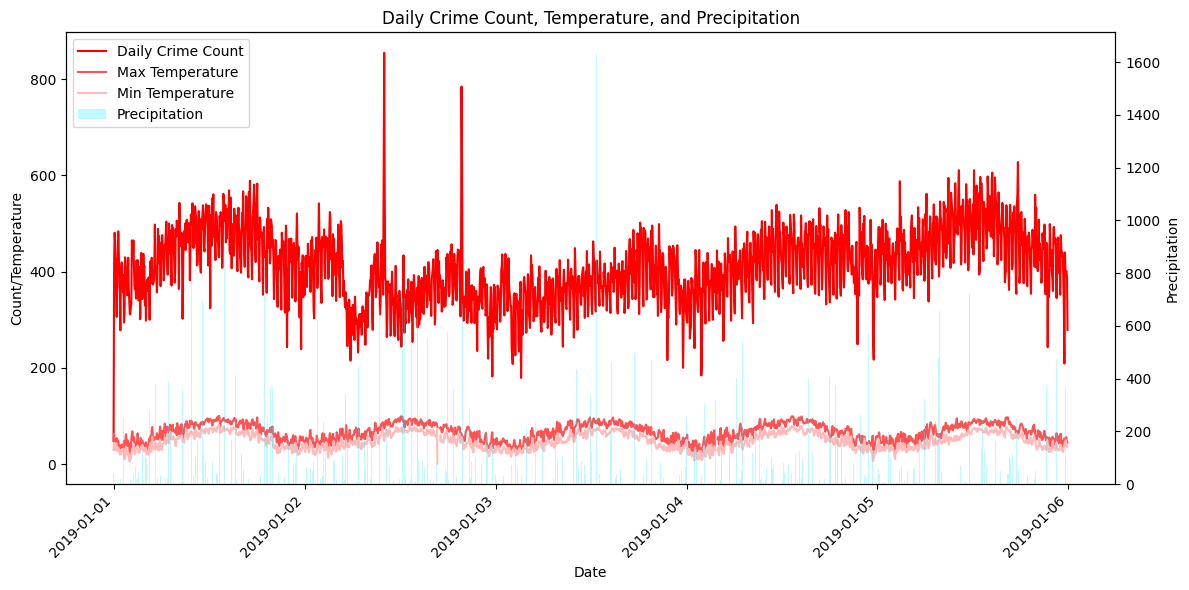

In [34]:
import matplotlib.pyplot as plt

daily_crime_counts = df_old.groupby('Date')['Category'].count()

daily_tmax = df_old.groupby('Date')['TMAX'].mean()
daily_tmin = df_old.groupby('Date')['TMIN'].mean()

daily_prcp = df_old.groupby('Date')['PRCP'].sum()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(daily_crime_counts.index, daily_crime_counts.values, color='red', label='Daily Crime Count')

ax1.plot(daily_tmax.index, daily_tmax.values, color='#ff5252', label='Max Temperature')

ax1.plot(daily_tmin.index, daily_tmin.values, color='#ffbaba', label='Min Temperature')

ax1.set_ylabel('Count/Temperature')

ax2 = ax1.twinx()

ax2.bar(daily_prcp.index, daily_prcp.values, color='#29edff', alpha=0.3, label='Precipitation')

ax2.set_ylabel('Precipitation')

ax1.set_xlabel('Date')
ax1.set_xticklabels(daily_crime_counts.index, rotation=45, ha='right')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Daily Crime Count, Temperature, and Precipitation')

plt.tight_layout()

plt.show()

Moving average

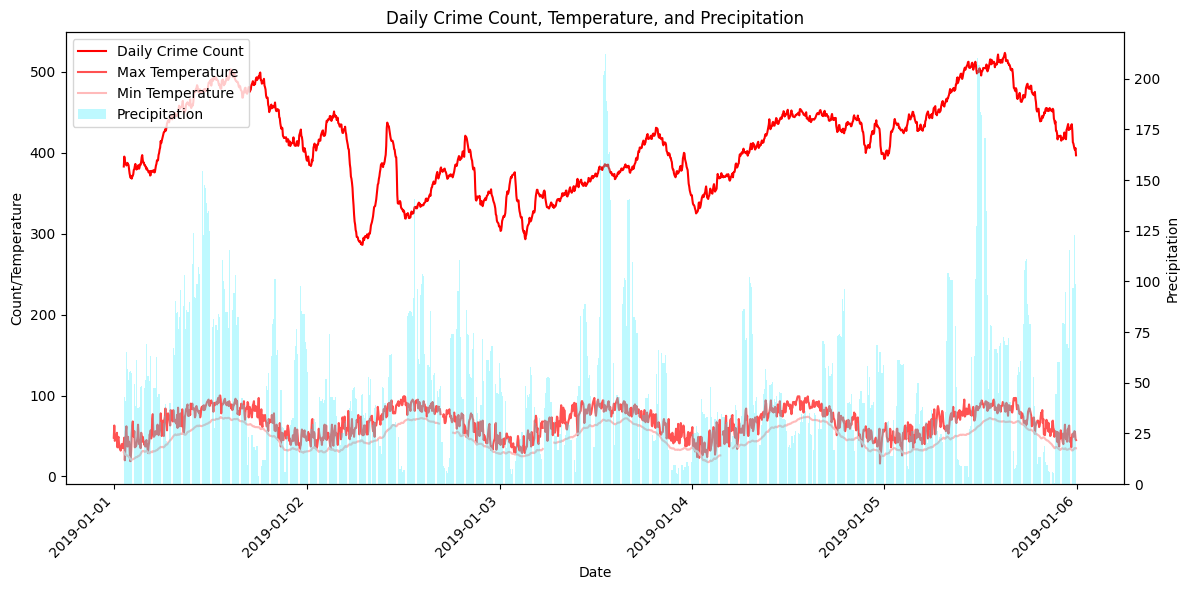

In [36]:
import matplotlib.pyplot as plt

daily_crime_counts = df_old.groupby('Date')['Category'].count()

daily_tmax = df_old.groupby('Date')['TMAX'].mean()
daily_tmin = df_old.groupby('Date')['TMIN'].mean()

daily_prcp = df_old.groupby('Date')['PRCP'].sum()


daily_crime_counts = daily_crime_counts.rolling(window=20).mean()

daily_tmax_smooth = daily_tmax.rolling(window=20).mean()

daily_tmin = daily_tmin.rolling(window=20).mean()

daily_prcp = daily_prcp.rolling(window=20).mean()


fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(daily_crime_counts.index, daily_crime_counts.values, color='red', label='Daily Crime Count')

ax1.plot(daily_tmax.index, daily_tmax.values, color='#ff5252', label='Max Temperature')

ax1.plot(daily_tmin.index, daily_tmin.values, color='#ffbaba', label='Min Temperature')

ax1.set_ylabel('Count/Temperature')

ax2 = ax1.twinx()

ax2.bar(daily_prcp.index, daily_prcp.values, color='#29edff', alpha=0.3, label='Precipitation')

ax2.set_ylabel('Precipitation')

ax1.set_xlabel('Date')
ax1.set_xticklabels(daily_crime_counts.index, rotation=45, ha='right')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Daily Crime Count, Temperature, and Precipitation')

plt.tight_layout()

plt.show()